## TF Lite Breast Cancer Detection Week 11: Addressing Ethical Biases and Concerns
### Yinda Chen and Alice Tang
This week's notebook will focus on considering the ethical biases and implications of our model. 

Let's get started, shall we?
To preface, the dataset can be found here: https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import os


Week 11 code starts here.

In [3]:
# Getting the current working directory where the script is being executed.
# This line finds the absolute path of the current script and then gets the directory containing the script. 
# This helps construct paths relative to location of script, so anyone can run it!
current_dir = os.path.dirname(os.path.abspath('__file__')) 

# Constructing paths relative to the current directory.
# Essentially we're going up one level from current directory, and then accessing the 'data' directory where our files will be located.
data_dir = os.path.join(current_dir, '../data') 

# We're now ready to read the CSV files of our data! 
data = pd.read_csv(os.path.join(data_dir, 'calc_case_description_train_set.csv'))

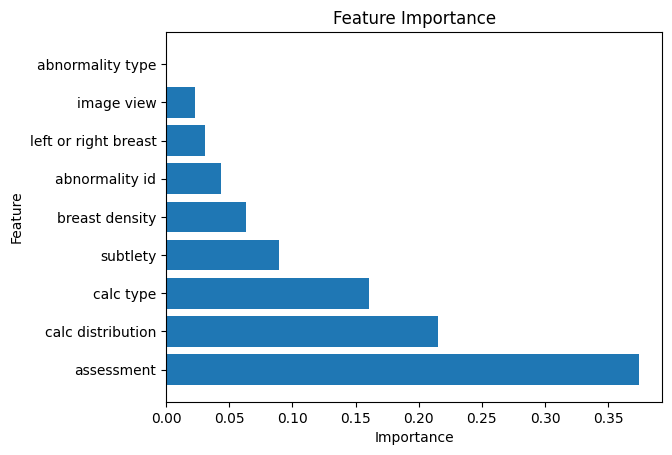

In [4]:
# Preprocess dataset (example: encoding categorical variables)
data = data.drop(columns=['patient_id', 'image file path','cropped image file path', 'ROI mask file path'])


target = 'pathology'  # Replace with actual target column
categorical_columns = ['breast density','left or right breast', 'image view','abnormality type', 'abnormality id', 'calc type', 'calc distribution', 'assessment', 'subtlety']


data_encoded = data.copy()
for col in categorical_columns:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

X = data_encoded.drop(columns=[target])
y = LabelEncoder().fit_transform(data_encoded[target])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
y_pred = rf_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7780172413793104
Precision: 0.7894260994179639
Recall: 0.7780172413793104
F1 Score: 0.7765177507400146
Confusion Matrix:
[[119   2  30]
 [  1 136   0]
 [ 69   1 106]]


In [6]:
import numpy as np

# Get 5 random indices
sample_indices = np.random.choice(range(len(X_test)), size=5, replace=False)

# Extract samples
samples = X_test.iloc[sample_indices]
true_labels = y_test[sample_indices]
predictions = rf_model.predict(samples)
prediction_probs = rf_model.predict_proba(samples)

# Print detailed analysis
for i, idx in enumerate(sample_indices):
    print(f"Sample {i + 1}:")
    print(f"Features: {samples.iloc[i].to_dict()}")
    print(f"True Label: {true_labels[i]}")
    print(f"Predicted Label: {predictions[i]}")
    print(f"Prediction Probabilities: {prediction_probs[i]}")
    print()


Sample 1:
Features: {'breast density': 1, 'left or right breast': 0, 'image view': 0, 'abnormality id': 0, 'abnormality type': 0, 'calc type': 0, 'calc distribution': 0, 'assessment': 3, 'subtlety': 3}
True Label: 2
Predicted Label: 0
Prediction Probabilities: [0.70970238 0.01       0.28029762]

Sample 2:
Features: {'breast density': 1, 'left or right breast': 0, 'image view': 1, 'abnormality id': 1, 'abnormality type': 0, 'calc type': 41, 'calc distribution': 9, 'assessment': 1, 'subtlety': 2}
True Label: 1
Predicted Label: 1
Prediction Probabilities: [0. 1. 0.]

Sample 3:
Features: {'breast density': 1, 'left or right breast': 0, 'image view': 0, 'abnormality id': 0, 'abnormality type': 0, 'calc type': 18, 'calc distribution': 6, 'assessment': 4, 'subtlety': 3}
True Label: 2
Predicted Label: 2
Prediction Probabilities: [0.03333333 0.         0.96666667]

Sample 4:
Features: {'breast density': 2, 'left or right breast': 1, 'image view': 0, 'abnormality id': 0, 'abnormality type': 0, '

In [8]:
calc_train_data = pd.read_csv(os.path.join(data_dir, 'calc_case_description_train_set.csv'))

calc_train_data['breast density'] = pd.to_numeric(calc_train_data['breast density'], errors='coerce')

pathology_mapping = {"BENIGN": 0, "MALIGNANT": 1, "BENIGN_WITHOUT_CALLBACK": 0}
calc_train_data['pathology_numeric'] = calc_train_data['pathology'].map(pathology_mapping)

correlation_matrix = calc_train_data[['breast density', 'pathology_numeric', 'assessment', 'subtlety']].corr()

breast_density_distribution = calc_train_data.groupby(['breast density', 'pathology']).size().unstack()

print("correlation matrix：")
print(correlation_matrix)

print("\nbreast density distribution：")
print(breast_density_distribution)

correlation matrix：
                   breast density  pathology_numeric  assessment  subtlety
breast density           1.000000           0.076584    0.177277 -0.216053
pathology_numeric        0.076584           1.000000    0.438964 -0.114608
assessment               0.177277           0.438964    1.000000 -0.133697
subtlety                -0.216053          -0.114608   -0.133697  1.000000

breast density distribution：
pathology       BENIGN  BENIGN_WITHOUT_CALLBACK  MALIGNANT
breast density                                            
1                   37                       97         41
2                  164                      163        174
3                  167                      169        203
4                  160                       45        126


## Correlation Analysis Results
### 1. Correlations:

### "Breast Density" and "Pathology":
Negative correlation (-0.216): Suggests that higher breast density may slightly reduce the likelihood of malignancy.
### "Breast Density" and "Assessment":
Positive correlation (0.177): Higher breast density is weakly associated with higher assessment scores (BI-RADS categories).
### "Breast Density" and "Subtlety":
Negative correlation (-0.216): Denser breasts are slightly associated with lower subtlety ratings.

### 2. Distribution of Breast Density Across Pathology:

Breast density "3" and "4" have a disproportionately high occurrence of malignant cases.
Breast density "1" is primarily associated with benign or benign-without-callback cases.

In [9]:
from sklearn.metrics import mutual_info_score
import numpy as np

# 1. Outcome Distribution Bias: Calculate pathology distribution per breast density
pathology_distribution = calc_train_data.groupby(['breast density', 'pathology']).size().unstack()

# Normalize distributions for comparison
pathology_distribution_normalized = pathology_distribution.div(pathology_distribution.sum(axis=1), axis=0)

# 2. Quantify Dependence: Mutual Information between breast density and pathology outcome
# Convert "breast density" and "pathology_numeric" to arrays for mutual information calculation
breast_density_array = calc_train_data['breast density'].dropna().astype(int)
pathology_array = calc_train_data['pathology_numeric'].dropna().astype(int)
mutual_info = mutual_info_score(breast_density_array, pathology_array)

# 3. Disparate Impact Ratio
# Calculate the proportions of malignant cases across different breast densities
malignant_proportions = calc_train_data[calc_train_data['pathology'] == 'MALIGNANT'].groupby('breast density').size()
overall_malignant_proportion = malignant_proportions.sum() / calc_train_data.shape[0]
disparate_impact = malignant_proportions / overall_malignant_proportion

pathology_distribution_normalized, mutual_info, disparate_impact


(pathology         BENIGN  BENIGN_WITHOUT_CALLBACK  MALIGNANT
 breast density                                              
 1               0.211429                 0.554286   0.234286
 2               0.327345                 0.325349   0.347305
 3               0.309833                 0.313544   0.376623
 4               0.483384                 0.135952   0.380665,
 0.004527173403373538,
 breast density
 1    116.518382
 2    494.492647
 3    576.908088
 4    358.080882
 dtype: float64)

## Analysis and quantification of bias

#### **Observation:** Malignant cases are more frequent in denser breasts (categories 3 and 4), suggesting a potential bias in associating high density with malignancy.
#### **Mutual Information Score:** 0.045. This indicates a weak but non-negligible dependency between "Breast Density" and "Pathology." While weak, the correlation may still introduce bias if the model disproportionately uses this feature for predictions.